In [1]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

In [2]:
# Read the CSV File

# df = pd.read_csv("foodData.csv")
df = pd.read_csv("newfooddata2 - Sheet1.csv")
df.head()

,UserID,Gender,Age Group,Top 6 most preferred dishes,laksa,Chili Crab,Char Kway Teow,hainanese chicken rice,Sliced Fish Soup,Fish and Chips,...,Roti Prata,Black Pepper Crab,Roti John,Cereal Prawn,Beef Kway Teow,Katong laksa,Sambal Stingray,Crab Bee Hoon Soup,Satay,sum
0,430,Female,25 - 54,"Laksa , Char Kway Teow, Hainanese Chicken Rice...",1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,6
1,103,Male,65 and above,"Char Kway Teow, Hainanese Chicken Rice, Sliced...",0,0,1,1,1,0,...,0,0,0,0,0,0,1,0,0,6
2,581,Male,25 - 54,"Laksa , Sliced Fish Soup, Chinese Economy Rice...",1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,6
3,816,Male,14 and below,"Hainanese Chicken Rice, Sliced Fish Soup, Chin...",0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,6
4,735,Female,15 - 24,"Char Kway Teow, Hainanese Chicken Rice, Japane...",0,0,1,1,0,0,...,1,0,0,0,1,0,0,0,0,6


In [3]:
# Separating the Datasets into different Dataframes

col_names = []
new_df = df

for col in df.columns:  
    x = col.replace(" ", "_")
    col_names.append(x)
    
new_df.columns = [col_names]
new_df = new_df.drop("sum", axis = 1)
new_df


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,UserID,Gender,Age_Group,Top_6_most_preferred_dishes,laksa,Chili_Crab,Char_Kway_Teow,hainanese_chicken_rice,Sliced_Fish_Soup,Fish_and_Chips,...,Kway_Chap,Roti_Prata,Black_Pepper_Crab,Roti_John,Cereal_Prawn,Beef_Kway_Teow,Katong_laksa,Sambal_Stingray,Crab_Bee_Hoon_Soup,Satay
0,430,Female,25 - 54,"Laksa , Char Kway Teow, Hainanese Chicken Rice...",1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,103,Male,65 and above,"Char Kway Teow, Hainanese Chicken Rice, Sliced...",0,0,1,1,1,0,...,1,0,0,0,0,0,0,1,0,0
2,581,Male,25 - 54,"Laksa , Sliced Fish Soup, Chinese Economy Rice...",1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,816,Male,14 and below,"Hainanese Chicken Rice, Sliced Fish Soup, Chin...",0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
4,735,Female,15 - 24,"Char Kway Teow, Hainanese Chicken Rice, Japane...",0,0,1,1,0,0,...,1,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,711,Female,15 - 24,"Hainanese Chicken Rice, Sliced Fish Soup, Hokk...",0,0,0,1,1,1,...,0,0,0,0,1,0,0,1,0,0
996,449,Female,25 - 54,"Chili Crab, Sliced Fish Soup, Bak Kut Teh, Bla...",0,0,0,0,1,0,...,0,0,1,1,1,0,0,1,0,0
997,91,Female,65 and above,"Chili Crab, Hainanese Chicken Rice, Sliced Fis...",0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
998,136,Male,65 and above,"Char Kway Teow, Hainanese Chicken Rice, Sliced...",1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Putting the food combinations into an array

food_combinations = []
disallowed_characters = "[] "

temp_df = new_df[[
              "laksa", "Chili_Crab", "Char_Kway_Teow", "hainanese_chicken_rice",
              "Sliced_Fish_Soup", "Fish_and_Chips", "Chinese_Economy_Rice",
              "Japanese_Bento", "Curry_laksa", "Yu_Sheng", "Duck_Rice",
              "Fish_Head_Curry", "Bak_Kut_Teh", "Hokkien_Mee", "Kway_Chap",
              "Roti_Prata", "Black_Pepper_Crab", "Roti_John", "Cereal_Prawn",
              "Beef_Kway_Teow", "Katong_laksa", "Sambal_Stingray", 
              "Crab_Bee_Hoon_Soup", "Satay"
             ]]
    
for i in temp_df.T:
    i_food = str(temp_df.iloc[i].values.ravel())
    for character in disallowed_characters:
        i_food = i_food.replace(character, "")
    food_combinations.append(i_food)

food_combinations

['101101010000100000000000',
 '001110100000001000000100',
 '100010001110000000000010',
 '000110110000010000000001',
 '001100010000001100010000',
 '100001110100000000010000',
 '010000000001000000110011',
 '100100100000100000001001',
 '100100010001010000100000',
 '001100100000011100000000',
 '001110000000001000000011',
 '100010001010000001000001',
 '100110100000010000000010',
 '000111000000010010100000',
 '101001000000000100100001',
 '000101010000010100010000',
 '010101000000100010000100',
 '010110010000010100000000',
 '000010100000111000000010',
 '101001000000010000100100',
 '110100010000000100100000',
 '100101110000000100000000',
 '100010110010000100000000',
 '100100010010000000010001',
 '101000100001101000000000',
 '111001010010000000000000',
 '000110100000110000000010',
 '010110000001010100000000',
 '000010100000101000000101',
 '011110010000001000000000',
 '000000100110010101000000',
 '100110100000000100000100',
 '101000010000100000100001',
 '010101010000000000001010',
 '001110000000

In [5]:
# newfooddata2 - Sheet1.csv > Top_6_most_preferred_dishes
# foodData.csv > _Top_6_most_preferred_dishes

le_data = LabelEncoder()

new_df["Gender_n"] = le_data.fit_transform(new_df["Gender"])
new_df["Age_Group_n"] = le_data.fit_transform(new_df["Age_Group"])
new_df["Top_6_most_preferred_dishes_n"] = le_data.fit_transform(new_df["Top_6_most_preferred_dishes"])

new_df["Food_Combinations"] = food_combinations

ref = new_df[["Gender_n", "Age_Group_n", "Top_6_most_preferred_dishes_n", "Food_Combinations"]]

X = new_df[["Gender_n", "Age_Group_n", "Food_Combinations"]]

y = new_df["Top_6_most_preferred_dishes_n"]

new_df.T



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
UserID,430,103,581,816,735,725,418,664,835,519,...,24,415,809,478,561,711,449,91,136,436
Gender,Female,Male,Male,Male,Female,Female,Female,Male,Male,Male,...,Female,Female,Male,Female,Male,Female,Female,Female,Male,Female
Age_Group,25 - 54,65 and above,25 - 54,14 and below,15 - 24,15 - 24,25 - 54,15 - 24,14 and below,25 - 54,...,65 and above,25 - 54,14 and below,25 - 54,25 - 54,15 - 24,25 - 54,65 and above,65 and above,25 - 54
Top_6_most_preferred_dishes,"Laksa , Char Kway Teow, Hainanese Chicken Rice...","Char Kway Teow, Hainanese Chicken Rice, Sliced...","Laksa , Sliced Fish Soup, Chinese Economy Rice...","Hainanese Chicken Rice, Sliced Fish Soup, Chin...","Char Kway Teow, Hainanese Chicken Rice, Japane...","Laksa , Fish and Chips, Japanese Bento, Yu She...","Chili Crab, Fish Head Curry, Cereal Prawn, Bee...","Laksa , Hainanese Chicken Rice, Chinese Econom...","Laksa , Hainanese Chicken Rice, Japanese Bento...","Char Kway Teow, Hainanese Chicken Rice, Chines...",...,"Sliced Fish Soup, Chinese Economy Rice, Japane...","Laksa , Japanese Bento, Hokkien Mee, Cereal Pr...","Laksa , Chili Crab, Char Kway Teow, Hainanese ...","Chili Crab, Char Kway Teow, Hainanese Chicken ...","Laksa , Chili Crab, Duck Rice, Bak Kut Teh, Kw...","Hainanese Chicken Rice, Sliced Fish Soup, Hokk...","Chili Crab, Sliced Fish Soup, Bak Kut Teh, Bla...","Chili Crab, Hainanese Chicken Rice, Sliced Fis...","Char Kway Teow, Hainanese Chicken Rice, Sliced...","Laksa , Char Kway Teow, Hokkien Mee, Kway Chap..."
laksa,1,0,1,0,0,1,0,1,1,0,...,0,1,1,0,1,0,0,0,1,1
Chili_Crab,0,0,0,0,0,0,1,0,0,0,...,0,0,1,1,1,0,0,0,0,0
Char_Kway_Teow,1,1,0,0,1,0,0,0,0,1,...,0,0,1,1,0,0,0,0,1,1
hainanese_chicken_rice,1,1,0,1,1,0,0,1,1,1,...,0,0,1,1,0,1,0,1,0,0
Sliced_Fish_Soup,0,1,1,1,0,0,0,0,0,0,...,1,0,0,0,0,1,1,1,0,0
Fish_and_Chips,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [6]:
# Split training and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print(f"X_train = {X_train.shape} X_test = {X_test.shape} y_train = {y_train.shape} y_test = {y_test.shape}")

X_train = (800, 3) X_test = (200, 3) y_train = (800, 1) y_test = (200, 1)


In [7]:
# Fitting data into model

model = RandomForestClassifier()

model.fit(X_train, y_train.values.ravel())

y_pred = model.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 33.36
Mean Squared Error: 6491.29
Root Mean Squared Error: 80.56854224820007


In [8]:
# Prediction

'''

Gender_n 
    Female = 0
    Male = 1
    
Age_Group_n
    14 and below = 0
    15 - 24 = 1
    25 - 54 = 2
    55 - 64 = 3
    65 and above = 4
    
'''

gender = input("Enter Gender : ")
age = int(input("Enter Age : "))
food_number = int(input("\nChose one Food Number (1 - 24) :\n1. Laksa\n2. Chilli Crab\n3. Char Kway Teow\n4. Hainanese Chicken Rice\n5. Sliced Fish Soup\n6. Fish and Chips\n7. Chinese Economy Rice\n8. Japanese Bento\n9. Curry Laksa\n10. Yu Sheng\n11. Duck Rice\n12. Fish Head Curry\n13. Bak Kut Teh\n14. Hokkien Mee\n15. Kway Chap\n16. Roti Prata\n17. Black Pepper\n18. Roti John\n19. Cereal Prawn\n20. Beef Kway Teow\n21. Katong Laksa\n22. Sambal Stingray\n23. Crab Bee Hoon\n24. Satay\n"))

new_number = 0

new_inp = int(24 - (food_number - 1))

new_number += (10 ** new_inp) - (10 ** (new_inp - 1) * 9)

gendern = 0
agen = 0

if gender == "Male".lower() or gender == "Male".upper():
    print("MALE - 1")
    gendern = 1
    if age > 0:
        if age < 15:
            print("14 and below")
            agen = 0
        elif age >= 15 and age <= 24:
            print("15 - 24")
            agen = 1
        elif age >= 25 and age <= 54:
            print("25 - 54")
            agen = 2
        elif age >= 55 and age <= 64:
            print("55 - 64")
            agen = 3
        elif age >= 65:
            print("65 and above")
            agen = 4
    else:
        print("Invalid Age")
    
elif gender == "Female".lower() or gender == "Female".upper():
    print("FEMALE - 0")
    gendern = 0
    if age > 0:
        if age < 15:
            print("14 and below")
            agen = 0
        elif age >= 15 and age <= 24:
            print("15 - 24")
            agen = 1
        elif age >= 25 and age <= 54:
            print("25 - 54")
            agen = 2
        elif age >= 55 and age <= 64:
            print("55 - 64")
            agen = 3
        elif age >= 65:
            print("65 and above")
            agen = 4
    else:
        print("Invalid Age")
    
else:
    print("Invalid Gender")
    
# if age > 0:
#     if age < 15:
#         print("14 and below")
#     elif age >= 15 and age <= 24:
#         print("15 - 24")
#     elif age >= 25 and age <= 54:
#         print("25 - 54")
#     elif age >= 55 and age <= 64:
#         print("55 - 64")
#     elif age <= 65:
#         print("65 and above")
# else:
#     print("Invalid Age")
    
print(food_number)
predictions = model.predict([[gendern, agen, new_number]])
predictions

Enter Gender : male
Enter Age : 12

Chose one Food Number (1 - 24) :
1. Laksa
2. Chilli Crab
3. Char Kway Teow
4. Hainanese Chicken Rice
5. Sliced Fish Soup
6. Fish and Chips
7. Chinese Economy Rice
8. Japanese Bento
9. Curry Laksa
10. Yu Sheng
11. Duck Rice
12. Fish Head Curry
13. Bak Kut Teh
14. Hokkien Mee
15. Kway Chap
16. Roti Prata
17. Black Pepper
18. Roti John
19. Cereal Prawn
20. Beef Kway Teow
21. Katong Laksa
22. Sambal Stingray
23. Crab Bee Hoon
24. Satay
12
MALE - 1
14 and below
12


array([327])

In [9]:
# Displaying similar Users
    
'''

Gender_n 
    Female = 0
    Male = 1
    
Age_Group_n
    14 and below = 0
    15 - 24 = 1
    25 - 54 = 2
    55 - 64 = 3
    65 and above = 4
    
'''
# newfooddata2 - Sheet1.csv > Top_6_most_preferred_dishes_n
# foodData.csv > _Top_6_most_preferred_dishes_n

# nth data of _Top_6_most_preferred_dishes_n
def nth_prefs(i):
    x = new_df.loc[i,"Top_6_most_preferred_dishes_n"]
    return x

# nth data of Gender_n
def nth_prefs2(i):
    x = new_df.loc[i,"Gender"]
    return x

# nth data of Age_Group_n
def nth_prefs3(i):
    x = new_df.loc[i,"Age_Group"]
    return x

# nth data of UserID
def nth_prefs4(i):
    x = new_df.loc[i,"UserID"]
    return x

# nth data of Food_Combinations
def nth_prefs5(i):
    x = new_df.loc[i,"Food_Combinations"]
    return x

# all the data of _Top_6_most_preferred_dishes_n
def all_prefs():
    x = new_df.loc[:,"Top_6_most_preferred_dishes_n"]
    return x


a = all_prefs().T
x_df = pd.DataFrame()
y_df = new_df


# Print specific rows based on chosen foods
for i in a:
    if nth_prefs(i).values.ravel() == predictions:
        d = {"UserID" : nth_prefs4(i).values.ravel(),
             "Top_6_most_preferred_dishes_n" : predictions,
             "Gender" : nth_prefs2(i).values.ravel(),
             "Age_Group" : nth_prefs3(i).values.ravel()
            }
        x_df = x_df.append(d, ignore_index=True)
        y_df = y_df.drop((nth_prefs4(i).values.ravel() - 1))
        
        
print("Predicted Value: ", predictions)
print("Chosen Gender: ", gender)
print("Chosen Age: ", age)
x_df

Predicted Value:  [327]
Chosen Gender:  male
Chosen Age:  12


,UserID,Top_6_most_preferred_dishes_n,Gender,Age_Group
0,[813],[327],[Male],[14 and below]
1,[980],[327],[Female],[14 and below]
2,[849],[327],[Male],[14 and below]
3,[920],[327],[Female],[14 and below]
4,[950],[327],[Female],[14 and below]
5,[885],[327],[Male],[14 and below]


In [10]:
a_df = pd.DataFrame()
rec_df = pd.DataFrame()
rec_list = []
count = 0

for i in a:
    if nth_prefs(i).values.ravel() == predictions:
        a_df = a_df.append(temp_df.iloc[[i]])
    
for i in a_df:
    if (a_df.T.iloc[[count]].values.ravel()).all() == 1:
        for j in i:
            j = j.replace("_", " ")
            rec_list.append(j)
    count += 1

chosen_food = temp_df.T.iloc[[food_number-1]].T

for i in chosen_food:
    for j in i:
        chosen_food = j.replace("_", " ")
    
for i in rec_list:
    if i == chosen_food:
        rec_list.remove(chosen_food)
        
if len(rec_list) == 6:
    rec_list.pop(0)
    
print("""
=========================================

Your Recommended Food Items are :
""")
for i in rec_list:
    print(i)

print("\n=========================================")
rec_list



Your Recommended Food Items are :

Japanese Bento
Curry laksa
Hokkien Mee
Roti Prata



['Japanese Bento', 'Curry laksa', 'Hokkien Mee', 'Roti Prata']

In [11]:
print(f"Accuracy of Random Forest Model is {accuracy_score(y_test, y_pred)}")

confusion_matrix(y_test, y_pred)

Accuracy of Random Forest Model is 0.445


array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

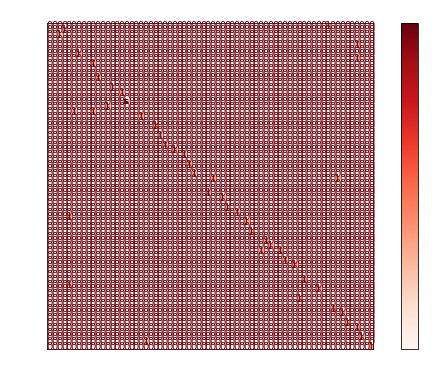

In [12]:
plot_X_test = X_test[:50]
plot_y_test = y_test[:50]

matrix = plot_confusion_matrix(model, plot_X_test, plot_y_test, cmap = plt.cm.Reds)
matrix.ax_.set_title("Confusion Matrix", color = "white")
plt.xlabel("Predicted Label", color = "white")
plt.ylabel("True Label", color = "white")
plt.gcf().axes[0].tick_params(colors = "white")
plt.gcf().axes[1].tick_params(colors = "white")
plt.gcf().set_size_inches(10, 6)
plt.show()